# Cross-validation

(CV) is one of the most important techniques in machine learning to check how well your model generalizes to unseen data.

# Why we need Cross-validation

If you train a model on one train–test split, your results might depend too much on which data happened to fall in train or test.

Cross-validation helps you use your data more efficiently and get a more reliable accuracy estimate.

Instead of doing one train/test split,
you split your data multiple times — and train/test each time.

The most common method is K-Fold Cross-Validation.

#K-Fold Cross-Validation
Steps:

* Split the dataset into K equal parts (folds).

For each fold:

* Use K−1 folds for training

* Use 1 fold for testing

* Repeat K times (each fold becomes the test set once).

* Take the average accuracy across all folds.

--------------------------------------------------------------------------
# 5-Fold CV

| Fold | Train Data    | Test Data | Accuracy |
| ---- | ------------- | --------- | -------- |
| 1    | Folds 2–5     | Fold 1    | 0.92     |
| 2    | Folds 1,3–5   | Fold 2    | 0.94     |
| 3    | Folds 1–2,4–5 | Fold 3    | 0.91     |
| 4    | Folds 1–3,5   | Fold 4    | 0.93     |
| 5    | Folds 1–4     | Fold 5    | 0.90     |


# ROC — Receiver Operating Characteristic Curve

The ROC curve shows the trade-off between sensitivity (True Positive Rate) and 1 - specificity (False Positive Rate) at various threshold values.

**Specificity** measures how well your model correctly identifies the negative (0) class.

Specificity=𝑇𝑁/𝑇𝑁+𝐹𝑃

	​
________________________________________________________________________


| Term                    | Formula                              | Meaning                     |
| ----------------------- | ------------------------------------ | --------------------------- |
| **True Positive (TP)**  | Model predicts 1 and it’s actually 1 | Correct positive prediction |
| **False Positive (FP)** | Model predicts 1 but it’s actually 0 | Wrong positive              |
| **True Negative (TN)**  | Model predicts 0 and it’s actually 0 | Correct negative            |
| **False Negative (FN)** | Model predicts 0 but it’s actually 1 | Missed positive             |

| Metric                         | Formula        | Interpretation                                      |
| ------------------------------ | -------------- | --------------------------------------------------- |
| **TPR (Sensitivity / Recall)** | TP / (TP + FN) | How many real positives we correctly identified     |
| **FPR (1 - Specificity)**      | FP / (FP + TN) | How many negatives we wrongly predicted as positive |


# AUC — Area Under the Curve

Range: 0 → 1
The AUC score ranges from 0 to 1, where a higher score indicates better performance.

| AUC Value | Interpretation     |
| --------- | ------------------ |
| 1.0       | Perfect classifier |
| 0.9–1.0   | Excellent          |
| 0.8–0.9   | Good               |
| 0.7–0.8   | Fair               |
| 0.6–0.7   | Poor               |
| 0.5       | Random guess       |
| < 0.5     | Worse than random  |



**In Simple Words**

The ROC–AUC curve tells you how well your model can separate positive and negative classes — across all possible thresholds, not just one.

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
# Step 2: Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

print("Features:", X.shape)
print("Target classes:", np.unique(y))


Features: (569, 30)
Target classes: [0 1]


In [ ]:
# Step 3: Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Feature scaling (SVM sensitive to feature scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Step 5: Define models
models = {
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [ ]:
# Step 6: Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {scores.mean():.3f}")


SVM: Mean CV Accuracy = 0.971
Logistic Regression: Mean CV Accuracy = 0.980
Decision Tree: Mean CV Accuracy = 0.910


In [ ]:
# Step 7: Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = model.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = acc

    print(f"\n=== {name} ===")
    print(f"Test Accuracy: {acc:.3f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))



=== SVM ===
Test Accuracy: 0.982
Confusion Matrix:
 [[41  1]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


=== Logistic Regression ===
Test Accuracy: 0.982
Confusion Matrix:
 [[41  1]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


=== Decision Tree ===
Test Accuracy: 0.912
Confusion Matrix:
 [[39  3]
 [ 7 65]]
Classification Report:
               precision    recal

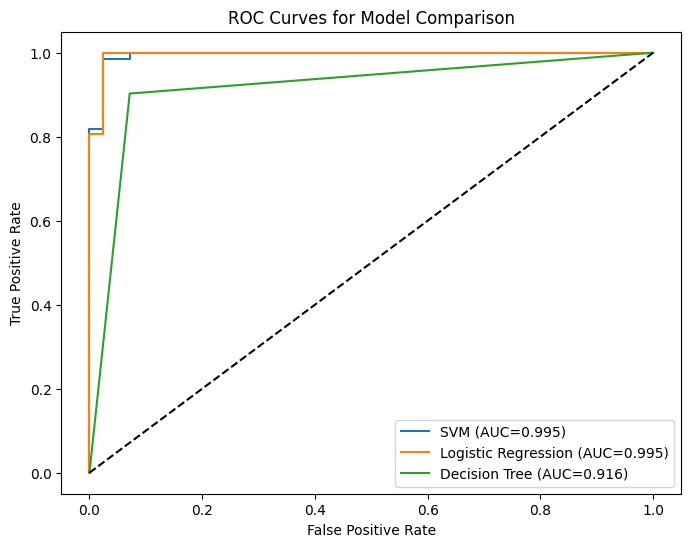

In [ ]:
# Step 8: ROC-AUC comparison
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]#Get predicted probabilities for the positive class (class 1).predict_proba() returns two columns:column 0 → probability of class 0 column 1 → probability of class 1
    fpr, tpr, _ = roc_curve(y_test, y_prob) #The function calculates TPR and FPR for different thresholds (e.g. 0.1, 0.2, …, 0.9).
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], 'k--')#If your ROC curve is above this line → model is better than random.If it’s below, the model performs worse than random (completely confused).
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Model Comparison")
plt.legend()
plt.show()


In [ ]:
# Step 9: Model Comparison Summary
comparison = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy'])
print("\nModel Comparison:\n")
print(comparison)



Model Comparison:

                     Test Accuracy
SVM                       0.982456
Logistic Regression       0.982456
Decision Tree             0.912281
